In [1]:
!apt install octave &> /dev/nul
!pip install oct2py &> /dev/nul
import oct2py
%load_ext oct2py.ipython

In [2]:
!octave --eval "pkg install -forge ga"

octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
For information about changes from previous versions of the ga package, run 'news ga'.


In [3]:
%%octave
clear all
close all
clc
pkg load ga

function [output]=stalagmite(input_vector)
x1=input_vector(1);
x2=input_vector(2);
f1x1=(sin(5.1*pi*x1+.5))^6;
f1x2=(sin(5.1*pi*x2+.5))^6;
f2x1=exp(-4*log(2)*(x1-.0667)^2/.64);
f2x2=exp(-4*log(2)*(x2-.0667)^2/.64);
[output]=-(f1x1*f2x1*f1x2*f2x2);
end


In [4]:
%%octave

x1s=linspace(0,.6,150);
x2s=linspace(0,.6,150);
num_cases=40;
[xx1 xx2]=meshgrid(x1s,x2s);
for i=1:length(xx1)
for j= 1:length(xx2)
input_vector(1)=xx1(i,j);
input_vector(2)=xx2(i,j);
f(i,j)=stalagmite(input_vector);
end
end

for i=1:num_cases
[inputs, fopt(i)]=ga(@stalagmite,2,[],[],[],[],[0;0],[1;1]);
x1opt(i)=inputs(1);
x2opt(i)=inputs(2);
end


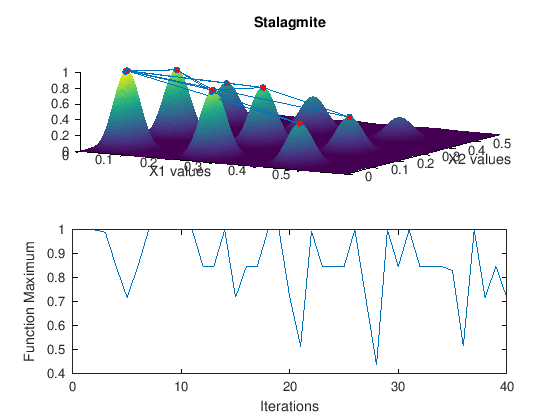

In [6]:
%%octave
figure(1)
subplot(2,1,1)
hold on
surfc(xx1,xx2,-f)
shading interp
plot3(x1opt,x2opt,-fopt,'marker','o','markersize',5,'markerfacecolor','r')
title('Stalagmite')
xlabel('X1 values')
ylabel('X2 values')
view(30,30)
subplot(2,1,2)
plot(-fopt)
xlabel('Iterations')
ylabel('Function Maximum')